# Customer Segmentation - Using K-means Clustering

Looking at customer dataset segmentations using unsupervised machine learning algorithm k-means clustering.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('Mall_Customers.csv')

In [4]:
# check shape of dataframe
data.shape

(200, 5)

In [5]:
# view first rows of dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# view statistics of dataset
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The output above shows that 'Gender' is the only variable in the dataset that is non integer.

In [8]:
# create a new dataframe, using only 'Annual income' and 'Spending score'
# use iloc to return selected columns and rows

data2 = data.iloc[:, [3,4]].values      # using columns 3 and 4

In [9]:
# Check the values of new dataset
data2

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Establish the optimum number of clusters

In [19]:
# create a blank list
wcss = []                           # wcss: Within Cluster Sum of Squares

In [20]:
# train model
for i in range(1,15):                                                       # run up to a maximum of 15 clusters
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)        # using a smart initialiser
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_)

C:\Users\leftf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


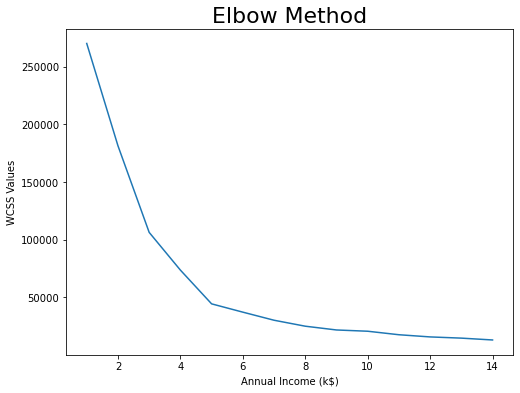

In [22]:
plt.figure(figsize = (8,6))                              # Plotsize
plt.plot(range(1,15), wcss)
plt.title('Elbow Method', fontsize=22)  
plt.xlabel('Annual Income (k$)')
plt.ylabel('WCSS Values')
plt.show()

The above elbow plot is used to establish the optimal k value for the dataset. From visual inspection the point on the line with the largest angle occurs at 5 on the x-axis (this is where the rate of descent slows). Therefore the optimal k value for this dataset is 5.

In [13]:
# Initialise the k-means model

kmeansmodel = KMeans(n_clusters = 5, init='k-means++', random_state=0)     # init: method for initilisation 

In [14]:
# Use model to make predictions

pred_kmeans = kmeansmodel.fit_predict(data2)

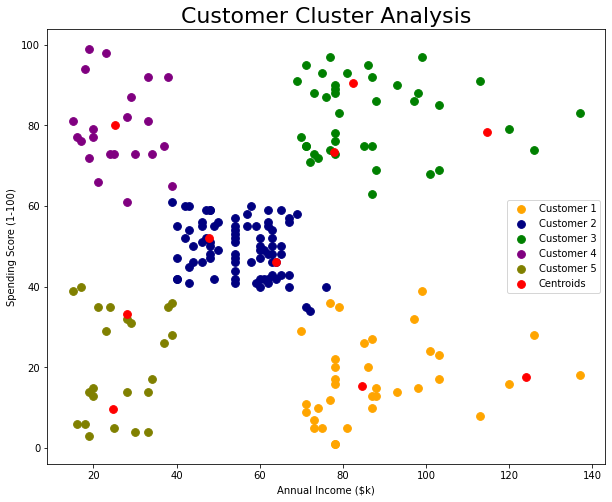

In [18]:
# Plot 
plt.figure(figsize = (10,8))                             
plt.title('Customer Cluster Analysis', fontsize=22)
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score (1-100)')

# Plot the 5 clusters
# each clusters is assigned a point in the matrix
plt.scatter(data2[pred_kmeans==0,0], data2[pred_kmeans==0,1], s=60, c="orange", label='Customer 1')     # 
plt.scatter(data2[pred_kmeans==1,0], data2[pred_kmeans==1,1], s=60, c="navy", label='Customer 2')   
plt.scatter(data2[pred_kmeans==2,0], data2[pred_kmeans==2,1], s=60, c="green", label='Customer 3') 
plt.scatter(data2[pred_kmeans==3,0], data2[pred_kmeans==3,1], s=60, c="purple", label='Customer 4') 
plt.scatter(data2[pred_kmeans==4,0], data2[pred_kmeans==4,1], s=60, c="olive", label='Customer 5')

#Plot the centroids:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, c ='red', label = 'Centroids')


plt.legend()
plt.show()

Upon visual inspection we can see that cluster 'Customer 2' contains the most amount of points than the other clusters.